In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("max_rows", 5)

In [20]:
# xs = np.arange(0, ns*spxs, spxs)
# ys = np.zeros_like(xs)
# zs = np.zeros_like(xs)
# dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs})

# dfs
# with open('aaatest.txt', mode='w+') as file : 
#     dfs.to_csv('aaatest.txt', sep='\t', mode='a', index=False)

## Prise des données (orientation EW)

In [21]:
n1= 7      #n premières électrodes manquantes
ns = 89    #n electrodes en surface (82+n1)
ne = 6     #n electrodes enterrées
ze = [-8.4,-9,-9.2,-7.3,-7.3,-7.5]    #profondeur max electrodes enterrées
spxs = 2  #distance interelectrode surface
spxe = 4  #distance interelectrode enterrées

In [22]:
a1 = 8 #première électrode
a2 = 48 #dernière électrode avant effondrement
a3= 49 #première électrode après effondrement
a4=89 #dernière électrode

In [23]:
xse = [39, 41, 43, 63, 65, 67] #première électrode de surface à l'E de l'électrode enterrée
xsesim = []
for i in range(len(xse)) :
    xsesim.append(xse[i]+1)
xsetot = xsesim+xse
xsetot.sort()
xsetot

[39, 40, 41, 42, 43, 44, 63, 64, 65, 66, 67, 68]

## Réseau d'électrodes

### Réseau en surface

In [24]:
xs = np.arange(0, ns*spxs, spxs)
ys = np.zeros_like(xs)
zs = np.zeros_like(xs)
dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs})
dfs.index += 1
dfs.drop (index = np.arange(1, n1+1), inplace = True)
dfs

,X,Y,Z
8,14,0,0
9,16,0,0
...,...,...,...
88,174,0,0
89,176,0,0


In [25]:
# xs = np.arange(0, (ns-n1)*spxs, spxs)
# ys = np.zeros_like(xs)
# zs = np.zeros_like(xs)
# liste_indexs= np.arange(n1+1,ns+1,1)
# dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs, '#' :liste_indexs})
# dfs.set_index('#', inplace=True)
# dfs

### Réseau enterré

In [26]:
xe = []
for i in range (len(xse)) :
    xe.append(spxs*(xse[i]-1)+spxs/2)
xe

[77.0, 81.0, 85.0, 125.0, 129.0, 133.0]

In [27]:
list_index= np.arange(101,101+ne,1)

ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfe

,X,Y,Z
#,,,
101,77.0,0.0,-8.4
102,81.0,0.0,-9.0
...,...,...,...
105,129.0,0.0,-7.3
106,133.0,0.0,-7.5


### Réseau d'électrode global

In [28]:
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
8,14.0,0.0,0.0
9,16.0,0.0,0.0
...,...,...,...
105,129.0,0.0,-7.3
106,133.0,0.0,-7.5


In [29]:
dfse1 = dfse.drop('Y', 'columns')

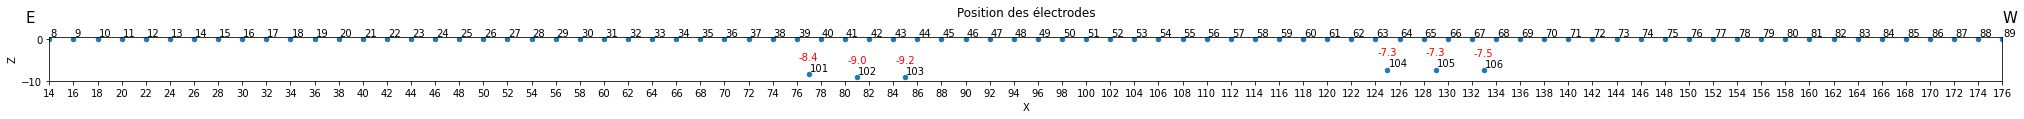

In [36]:
fig, ax = plt.subplots()
dfse.plot.scatter(x='X', y='Z', title='Position des électrodes\n', grid=False, yticks=[0,-10], xticks=dfs['X'], figsize=(35,0.8), ax=ax, xlim=(14,176))
                  #xlim=(dfs.at[n1+1, 'X'], dfs.at[len(dfs)+n1, 'X']))
for k, v in dfse1.iterrows():
    ax.annotate(k, v, xytext=(1,3), textcoords='offset points', fontsize=10)
    if k>100 :
        ax.annotate(dfse.at[k, 'Z'], v, xytext=(-10,14), textcoords='offset points', fontsize=10, color='red')
ax.text(12, 4, 'E', fontsize=15)
ax.text(176, 4, 'W', fontsize=15)
plt.show() 

## Séquences de mesures (quadripôle)

### Une électrode enterrée

#### AMnB sim impair

In [318]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(101,101+ne,1)) :
    for i in range(0, min(k-1,ns-k)) :
        for j in range(0,2) :
            A = k-1-i+j
            B = k+1+i+j
            M = k+j
            N = v
            if A<a1 or B>a4 :
                pass
            else :
                seq.append([A,B,M,N])

list= np.arange(1,len(seq)+1)
df_seqtest4sim = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])

df_seqtest4sim=df_seqtest4sim.sort_values(by=['A','B'])
df_seqtest4sim['#']=list
df_seqtest4sim.set_index('#', inplace=True)
df_seqtest4sim

,A,B,M,N
#,,,,
1,8,70,39,101
2,8,72,40,101
...,...,...,...,...
341,66,70,68,106
342,67,69,68,106


In [319]:
with open('aa4impair.txt', mode='w+') as file : 
    dfse.to_csv('aa4impair.txt', sep='\t', mode='a', index=True)

with open('aa4impair.txt', mode='a') as file : 
    df_seqtest4sim.to_csv('aa4impair.txt', sep='\t', mode='a', index=True)

#### AbMN (bof)

In [74]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(101,101+ne,1)) :
    for w in range(0, 6) :
        for i in range(1, ns+1) :
            A = k
            B = v
            M = i
            N = i+1+2*w
            if a1<M<a2 or a1<N<a2 or M==k or N==k or N>k+31 or N>ns or (N>k and M<k) :
                pass
            else :
                seq.append([A,B,M,N])
df_seqtest6=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest6.index += 1
df_seqtest6

,A,B,M,N
1,39,101,48,49
2,39,101,49,50
...,...,...,...,...
860,67,106,77,88
861,67,106,78,89


In [75]:
with open('aaa6bof.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('aaa6bof.txt', sep='\t', mode='a', index=True)

with open('aaa6bof.txt', mode='a') as file : 
    file.write('#')
    
df_seqtest6.to_csv('aaa6bof.txt', sep='\t', mode='a', index=True)

### Deux électrodes enterrées

#### AbMn +++

In [76]:
#2 mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1

#1 mobile g
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i]
            N = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1

#1 mobile d
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1

df_seqtest9=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest9.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
list= np.arange(1,len(df_seqtest9)+1)

df_seqtest9=df_seqtest9.sort_values(by=['A','B'])
df_seqtest9['#']=list
df_seqtest9.set_index('#', inplace=True)
df_seqtest9

,A,B,M,N
#,,,,
1,35,101,46,102
2,35,101,48,103
...,...,...,...,...
239,66,105,71,106
240,66,105,72,106


In [77]:
with open('2aa9.txt', mode='w+') as file :
    file.write('#')
dfse.to_csv('2aa9.txt', sep='\t', mode='a', index=True)

with open('2aa9.txt', mode='a') as file : 
    df_seqtest9.to_csv('2aa9.txt', sep='\t', mode='a', index=True)

#### AnMb

In [78]:
#2 mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
        
#1 mobile g
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 10) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i]
            B = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
        
#1 mobile d
a=ne
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 10) :
            A = xse[k]+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if A<a1 or A>a4 or M<a1 or M>a4 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1

df_seqtest8=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest8.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
list= np.arange(1,len(df_seqtest8)+1)

df_seqtest8=df_seqtest8.sort_values(by=['A','B'])
df_seqtest8['#']=list
df_seqtest8.set_index('#', inplace=True)
df_seqtest8

,A,B,M,N
#,,,,
1,31,102,41,101
2,31,103,43,101
...,...,...,...,...
359,66,106,75,105
360,66,106,76,105


In [79]:
with open('2aa8.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('2aa8.txt', sep='\t', mode='a', index=True)

with open('2aa8.txt', mode='a') as file : 
    df_seqtest8.to_csv('2aa8.txt', sep='\t', mode='a', index=True)

#### AmnB

In [80]:
seq=[]

for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        M = xse[k]-i+1
        N = xse[k+1]+i
        A = v
        B = v+1
        if N<a1 or N>a4 or M<a1 :
            pass
        else :
            seq.append([A,B,M,N])

for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        M = xse[k]-i+1
        N = xse[k+1]
        A = v
        B = v+1
        if N<a1 or N>a4 or M<a1 :
            pass
        else :
            seq.append([A,B,M,N])
            
for k, v in zip(range(len(xse[:-1])), range(101,101+ne,1)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        M = xse[k]+1
        N = xse[k+1]+i
        A = v
        B = v+1
        if N<a1 or N>a4 or M<a1 :
            pass
        else :
            seq.append([A,B,M,N])
df_seqtest13=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest13.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
list= np.arange(1,len(df_seqtest13)+1)

df_seqtest13=df_seqtest13.sort_values(by=['A','B'])
df_seqtest13['#']=list
df_seqtest13.set_index('#', inplace=True)
df_seqtest13

,A,B,M,N
#,,,,
1,101,102,40,41
2,101,102,39,42
...,...,...,...,...
430,105,106,66,88
431,105,106,66,89


In [81]:
with open('2aa13.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('2aa13.txt', sep='\t', mode='a', index=True)

with open('2aa13.txt', mode='a') as file : 
    df_seqtest13.to_csv('2aa13.txt', sep='\t', mode='a', index=True)

### Trois électrodes enterrées

#### aNmb

In [82]:
seq = []
for k in (range(101,101+ne-2,1)) :
    for i in range(1, ns+1) :
        A = k
        B = k+2 
        M = k+1
        N = i
        if N<a1 or N>a4 :
                pass
        else :
            seq.append([A,B,M,N])
df_seqtest15=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest15.index += 1
df_seqtest15 #3 électrodes enterrées

,A,B,M,N
1,101,103,102,8
2,101,103,102,9
...,...,...,...,...
327,104,106,105,88
328,104,106,105,89


In [83]:
with open('2aa15.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('2aa15.txt', sep='\t', mode='a', index=True)

with open('2aa15.txt', mode='a') as file : 
    file.write('#')
    
df_seqtest15.to_csv('2aa15.txt', sep='\t', mode='a', index=True)

### Quatre électrodes enterrées

In [43]:
seq=[]
maxSep = ne - 2

# #wenner alpha
# for sep in range(1, maxSep + 1):
#             for i in range(101,(ne - 2) - sep+101):
#                 a = i
#                 m = a + sep
#                 n = m + sep
#                 b = n + sep
#                 if b > 100+ne :
#                     pass
#                 else :
#                     seq.append([a,b,m,n])
                    
# #wenner beta
# for sep in range(1, maxSep + 1):
#     for i in range(101,(ne - 2) - sep+101):
#         a = i
#         b = a + sep
#         m = b + sep
#         n = m + sep
#         if n > 100+ne :
#             pass
#         else :
#             seq.append([a,b,m,n])


# schlumberger
for sep in range(1, maxSep + 1):
    for i in range(101,(ne - 2) - sep+101):
        a = i
        m = a + sep
        n = m + 1
        b = n + sep
        if b > 100+ne :
            pass
        else :
            seq.append([a,b,m,n])  
            
# dipole dipole
for space in range(0, ne-2) :
    for i in range(101, 106) :
        a = i
        b = a+1
        m = b+1+space
        n = m+1
        if n > 100+ne :
            pass
        else :
            seq.append([a,b,m,n])
df_seq4_enterres = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seq4_enterres.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seq4_enterres.index += 1
df_seq4_enterres #4 électrodes enterrées

,A,B,M,N
1,101,104,102,103
2,102,105,103,104
...,...,...,...,...
9,102,103,105,106
10,101,102,105,106


In [44]:
with open('aa4enter.txt', mode='w+') as file : 
    dfse.to_csv('aa4enter.txt', sep='\t', mode='a', index=True)

with open('aa4enter.txt', mode='a') as file : 
    file.write('#')
    
df_seq4_enterres.to_csv('aa4enter.txt', sep='\t', mode='a', index=True)

## Gradient + dipole-dipole

In [316]:
# gradient
seq=[]
ab_sep_base = 12  # number of channels + 2   avant : 9
ev = 2
takeevery = 2
max_fak = int(np.ceil(ns / ab_sep_base))
ab_space = [ii*ab_sep_base for ii in range(max_fak) if ii % ev == 1]
mn_space = [ii for ii in range(max_fak) if ii % takeevery == 1]
for ab in range(len(ab_space)):  # ab spacings
    for aa in np.arange(1, ns-ab_space[ab]+1, 1):  # a index
        mn = mn_space[ab]
        for mm in np.arange(aa+mn, aa+ab_space[ab]-mn, mn):
            a=int(aa)
            b=int(aa+ab_space[ab])
            m=int(mm)
            n=int(mm+mn)
            
            if a>7: seq.append([a,b,m,n])
            else :  pass
                
            # if a3<a<a4 or a3<b<a4 or a3<m<a4 or a3<n<a4 :
            #     seq.append([a,b,m,n])
            # else :
            #     pass    
grad = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
grad.index += 1
grad

,A,B,M,N
1,8,20,9,10
2,8,20,10,11
...,...,...,...,...
1379,29,89,74,79
1380,29,89,79,84


In [290]:
with open('aagradsurf1.txt', mode='w+') as file : 
    dfse.to_csv('aagradsurf1.txt', sep='\t', mode='a', index=True)

with open('aagradsurf1.txt', mode='a') as file : 
    file.write('#')
    
grad.to_csv('aagradsurf1.txt', sep='\t', mode='a', index=True)

In [15]:
# dipole dipole
seq=[]
for space in range(0, ns-2) :
    for i in range(1, ns-2) :
        a = i
        b = a+1
        m = b+1+space
        n = m+1
        # if (a3<a<a4 or a3<b<a4 or a3<m<a4 or a3<n<a4) and m<89 and n<89  :
        #     seq.append([a,b,m,n])
        # else :
        #     pass
        if m>a4 or n>a4  or a<a1 : pass
        else : seq.append([a,b,m,n])

list= np.arange(1,len(seq)+1)
dip_dip = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
#"dip_dip.index += 1
dip_dip=dip_dip.sort_values(by=['A','B'])
dip_dip['#']=list
dip_dip.set_index('#', inplace=True)
dip_dip



# ye = np.zeros_like(xe)
# dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
# dfe.set_index('#', inplace=True)
# dfe

,A,B,M,N
#,,,,
1,8,9,10,11
2,8,9,11,12
...,...,...,...,...
3159,85,86,88,89
3160,86,87,88,89


In [256]:
with open('aadipdip1.txt', mode='w+') as file : 
    dfse.to_csv('aadipdip1.txt', sep='\t', mode='a', index=True)

with open('aadipdip1.txt', mode='a') as file :     
    dip_dip.to_csv('aadipdip1.txt', sep='\t', mode='a', index=True)